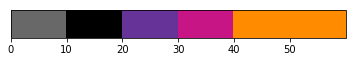

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['#686868', 'black', 'rebeccapurple', 'mediumvioletred', 'darkorange'])
# cmap.set_over('0.25')
# cmap.set_under('0.75')

bounds = [0, 10, 20, 30, 40, 50]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bounds + [60],
#                                 extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
# cb2.set_label('Discrete intervals, some other units')
fig.show()


input data:

npz file shape [2,]
0 - numpy object - nodes [n,3] (3 coordinates for each node)
1 - numpy object - edge weight [n,n] symmetric- weights for each pair of nodes



In [1]:
import pandas as pd
import numpy as np

In [75]:
# tvb data
# get the coordinates data
#sep is a regex expression bc the delimeter ranges from 1-3 white spaces

df = pd.read_csv("/Users/rabiyanoori/Documents/GitHub/Brain_Viz/_scratch/centres.txt", sep = " * ", header=None)
coords_data = df.to_numpy()
coord_names = coords_data[:,0]
#coords_data = coords_data[:,1:4]
#np.save("coords.npy", coords_data)

/Users/rabiyanoori/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [10]:
# tvb data
# get the weights data
#sep is a regex expression bc the delimeter ranges from 1-3 white spaces

df = pd.read_csv("/Users/rabiyanoori/Documents/GitHub/Brain_Viz/weights.txt", sep = " * ", header=None)
weights_data = df.to_numpy()
weights_data
#np.save("weights.npy", weights_data)

/Users/rabiyanoori/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


array([[3., 3., 0., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.]])

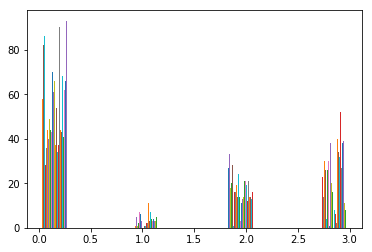

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(weights_data)
plt.show()

In [19]:
weights_data > 2

array([[ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Importing Jeremie's Data

In [12]:
# the data that jeremie sent
# get the weights data
#sep is a regex expression bc the delimeter ranges from 1-3 white spaces

df = pd.read_csv("/Users/rabiyanoori/Documents/GitHub/Brain_Viz/_scratch/Weights96.txt", sep = " * ", header=None)
weights_j = df.to_numpy()
weights_j
# np.save("weights_j.npy", weights_j)

/Users/rabiyanoori/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


array([[3., 3., 0., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.]])

In [13]:
# the data that jeremie sent
# get the lengths data
#sep is a regex expression bc the delimeter ranges from 1-3 white spaces

df = pd.read_csv("/Users/rabiyanoori/Documents/GitHub/Brain_Viz/_scratch/Lengths96.txt", sep = " * ", header=None)
lengths_j = df.to_numpy()
lengths_j
# np.save("weights_j.npy", weights_j)

/Users/rabiyanoori/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


array([[ 0.       , 46.385806 , 24.759684 , ..., 67.04211  , 60.587547 ,
        53.277883 ],
       [46.385806 ,  0.       , 48.700592 , ..., 86.40132  , 78.69682  ,
        78.640757 ],
       [24.759684 , 48.700592 ,  0.       , ..., 44.522309 , 37.869414 ,
        32.314474 ],
       ...,
       [67.04211  , 86.40132  , 44.522309 , ...,  0.       ,  8.3379586,
        20.396738 ],
       [60.587547 , 78.69682  , 37.869414 , ...,  8.3379586,  0.       ,
        20.008075 ],
       [53.277883 , 78.640757 , 32.314474 , ..., 20.396738 , 20.008075 ,
         0.       ]])

In [11]:
# the data that jeremie sent
# get the coordinates data
#sep is a regex expression bc the delimeter ranges from 1-3 white spaces

#df = pd.read_csv("/Users/rabiyanoori/Documents/GitHub/Brain_Viz/_scratch/Kuramoto - Conduction speed matrix - before.txt", sep='\t', header=None)
df = pd.read_csv("/Users/rabiyanoori/Documents/GitHub/Brain_Viz/_scratch/Kuramoto - Conduction speed matrix - after.txt", sep='\t', header=None)


temp = df.to_numpy()
cv_data = np.ones((96,96))*-999
cntr = 0
for i in range(96):
    for j in range(96):
        cv_data[i,j] = temp[cntr,3]
        cntr= cntr + 1
np.max(cv_data)
#np.save("cv_before.npy", cv_data)

55.6504

# Plotting

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:

cmap = "viridis"


In [77]:
coord_names_skip = np.copy(coord_names)
for i in range(len(coord_names)):
    if i%6 !=0:
        coord_names_skip[i] = ""

array(['RM-TCpol_R', 'RM-TCs_R', 'RM-Amyg_R', 'RM-PFCoi_R', 'RM-IA_R',
       'RM-PFCom_R', 'RM-TCc_R', 'RM-PFCol_R', 'RM-TCi_R', 'RM-PHC_R',
       'MM82a-G_R', 'RM-PMCvl_R', 'RM-VACv_R', 'RM-Ip_R', 'RM-PFCpol_R',
       'RM-HC_R', 'RM-CCs_R', 'RM-PFCvl_R', 'RM-V2_R', 'RM-PFCm_R',
       'RM-TCv_R', 'RM-VACd_R', 'RM-V1_R', 'RM-PFCcl_R', 'RM-A2_R',
       'RM-CCr_R', 'RM-CCp_R', 'RM-CCa_R', 'RM-S2_R', 'RM-S1_R',
       'RM-A1_R', 'RM-M1_R', 'RM-PCi_R', 'RM-PCm_R', 'RM-PFCdm_R',
       'RM-PCip_R', 'RM-PCs_R', 'RM-FEF_R', 'RM-PFCdl_R', 'RM-PMCm_R',
       'RM-PMCdl_R', 'TM-F_R', 'TM-T_R', 'TM-OP_R', 'BG-Cd_R', 'BG-Pu_R',
       'BG-Pa_R', 'BG-Acc_R', 'RM-TCpol_L', 'RM-TCs_L', 'RM-Amyg_L',
       'RM-PFCoi_L', 'RM-IA_L', 'RM-PFCom_L', 'RM-TCc_L', 'RM-PFCol_L',
       'RM-TCi_L', 'RM-PHC_L', 'MM82a-G_L', 'RM-PMCvl_L', 'RM-VACv_L',
       'RM-Ip_L', 'RM-PFCpol_L', 'RM-HC_L', 'RM-CCs_L', 'RM-PFCvl_L',
       'RM-V2_L', 'RM-PFCm_L', 'RM-TCv_L', 'RM-VACd_L', 'RM-V1_L',
       'RM-PFCcl_L', 'R

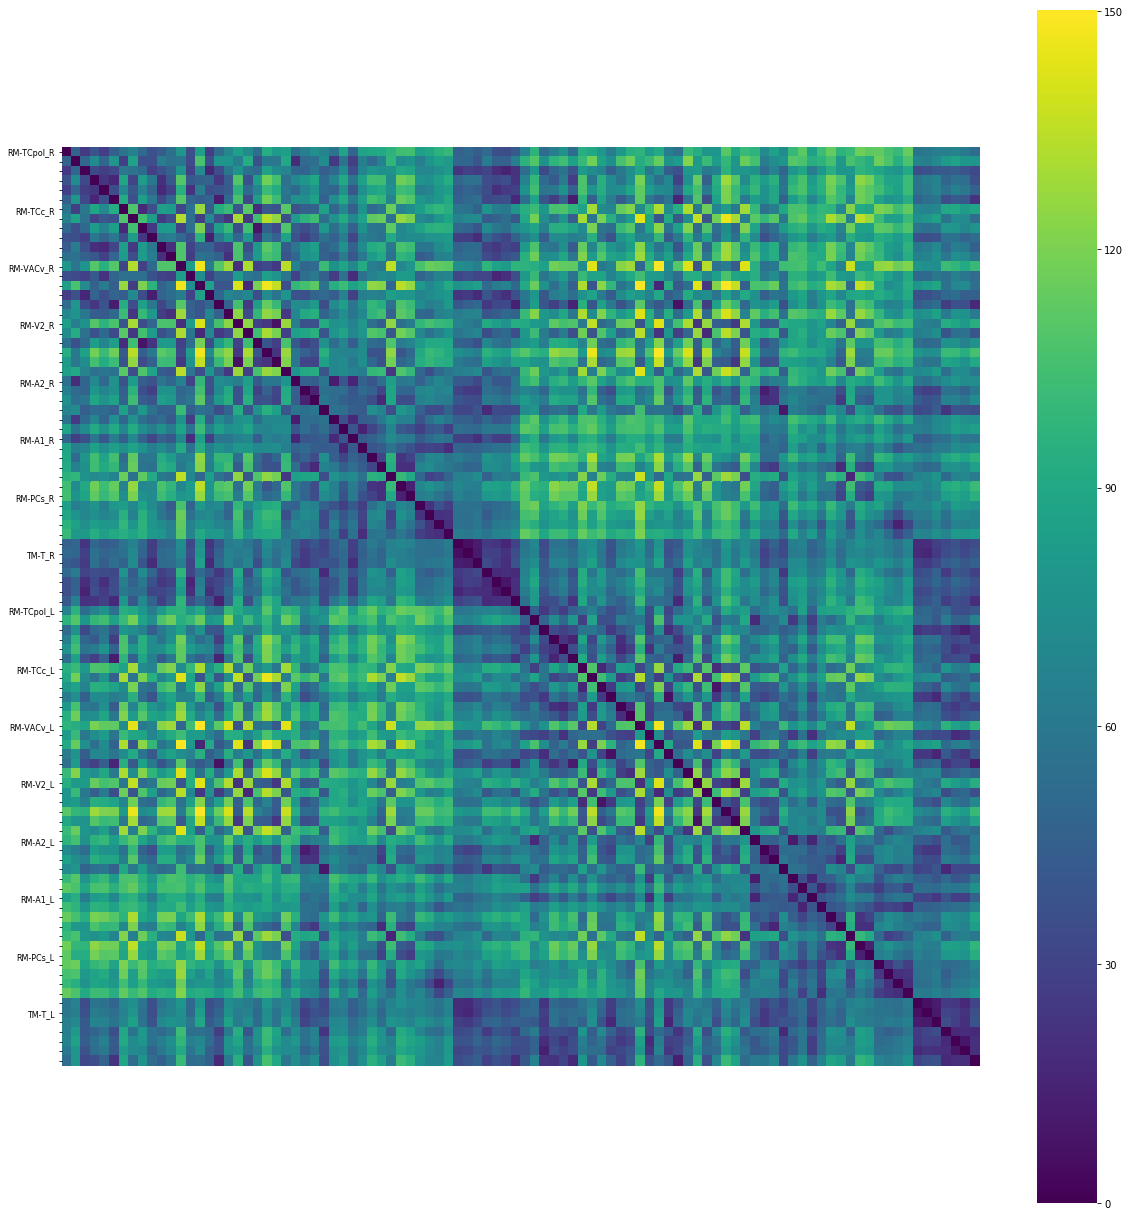

In [116]:
plt.figure(figsize=(17, 17))


# plt.figure(dpi = 200)
sns.heatmap(lengths_j, 
           cmap = cmap,
            yticklabels = coord_names_skip,
            xticklabels= [],
             square = True
           )
plt.yticks(fontsize = 8, multialignment ='center')
plt.tight_layout()
plt.savefig("small_mat.jpg",dpi=1000, transparent = True)
plt.show()

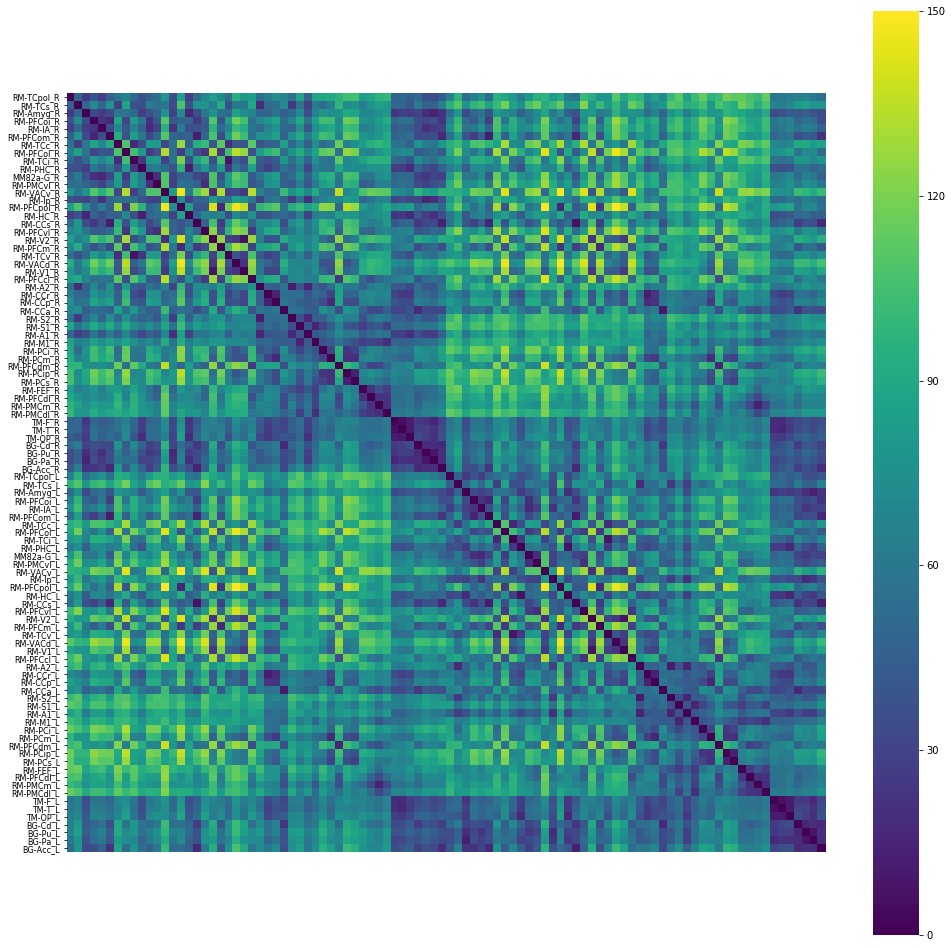

In [114]:
plt.figure(figsize=(17, 17))
# plt.figure(dpi = 200)


sns.heatmap(lengths_j, 
           cmap = cmap,
            yticklabels = coord_names,
            xticklabels= [],
            square = True
           )
plt.yticks(fontsize = 8, multialignment ='center')
plt.savefig("big_mat.jpg", dpi=1000, transparent = True)
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

dtype = [('temp', 'f4'), ('depth', 'f4')]
kw = dict(usecols=(0, 1), dtype=dtype)
xbt_raw = np.genfromtxt('./data/C4_XBT_22.EDF', skip_header=41, **kw)
xbt_smoo = np.loadtxt('./data/C4_XBT_22.ASC', **kw)
ctd = np.loadtxt("./data/C4_CTD_22.ASC", **kw)
deg = u"\u00b0"
raw = dict(color='#FF8000', marker='.', linestyle='none', alpha=0.5, label='XBT Raw')
smoo = dict(color='#2E2E2E', linestyle='-.', label='XBT Smooth')
comp = dict(color='#0B610B', label='CTD')

fig, ax = plt.subplots(figsize=(4, 6))
ax.invert_yaxis()
ax.plot(ctd['depth'], ctd['temp'], **comp)
ax.plot(xbt_raw['depth'], xbt_raw['temp'], **raw)
ax.plot(xbt_smoo['depth'], xbt_smoo['temp'], **smoo)
ax.set_ylabel('Pressure [dbar]')
ax.set_xlabel(u'Temperature %sC' % deg)
ax.legend(numpoints=1, loc='upper left')

# Zoom 1.
axins = zoomed_inset_axes(ax, 5, loc=5)
axins.plot(ctd['depth'], ctd['temp'], **comp)
axins.plot(xbt_raw['depth'], xbt_raw['temp'], **raw)
axins.plot(xbt_smoo['depth'], xbt_smoo['temp'], **smoo)
axins.invert_yaxis()
axins.axis([3.5, 3.8, 1420, 1300])
axins.xaxis.tick_top()
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.xaxis.set_major_locator(MaxNLocator(nbins=1, prune='lower'))

# Zoom 2.
axins_2 = zoomed_inset_axes(axins, 10,  loc=4,
                     bbox_to_anchor=(1.2, 0.75),
                     bbox_transform=ax.figure.transFigure)

axins_2.plot(ctd['depth'], ctd['temp'], **comp)
axins_2.plot(xbt_raw['depth'], xbt_raw['temp'], **raw)
axins_2.plot(xbt_smoo['depth'], xbt_smoo['temp'], **smoo)
axins_2.axis([3.6, 3.75, 1360, 1340])
axins_2.invert_yaxis()
axins_2.set_yticks([])
axins_2.set_xticks([])
axins_2.set_axis_bgcolor('none')
axes = mark_inset(axins, axins_2, loc1=2, loc2=4, fc="none", ec="0.5")

OSError: ./data/C4_XBT_22.EDF not found.

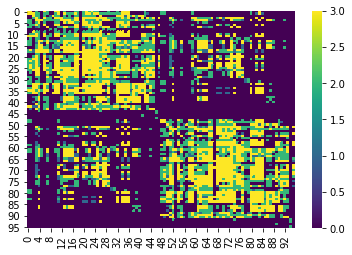

In [25]:
sns.heatmap(weights_j,
           cmap = cmap)

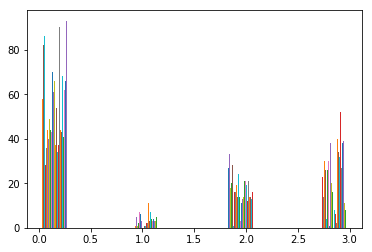

NameError: name 'cv_data' is not defined

In [20]:
plt.hist(weights_j)
plt.show()
cv_data[cv_data > 3.]

In [ ]:
from visbrain.objects import ConnectObj, SceneObj, SourceObj, BrainObj
from visbrain.io import download_file
arch = np.load(download_file('phase_sync_delta.npz', astype='example_data'))

In [ ]:
nodes, edges = arch['nodes'], arch['edges']
# Create the scene with a black background
sc = SceneObj(size=(1500, 600))


In [ ]:
import seaborn as sns
sns.heatmap(edges)


In [ ]:
import matplotlib.pyplot as plt

plt.show()

In [ ]:
edges[46,7] ==edges[7,46]

In [59]:
temp = np.ones((4,4))
temp[0,2] = 34
temp[0,3] = 20

In [60]:
temp

array([[ 1.,  1., 34., 20.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [64]:
thing1 = temp > 10

In [65]:
thing2 = temp < 25

In [66]:
thing1 == thing2

array([[False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])